# Convolutional Neural Networks (CNNs)

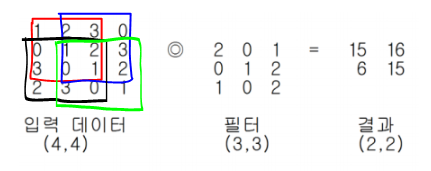

In [1]:
import os
from IPython.display import Image

# 경로 설정
file_path = './Example_CNN.PNG'
Image(file_path)

필요한 Package 불러오기

In [2]:
import numpy as np

합성곱(Convolution) 연산 구현

1. Image와 Filter 정의
2. Stride: Filter의 이동 간격
3. Output size = ((H + 2P - FH / S)+ 1, (W + 2P - FW / S) + 1)

In [3]:
image = np.array([[1, 2, 3, 0], 
                  [0, 1, 2, 3], 
                  [3, 0, 1, 2], 
                  [2, 3, 0, 1]])


filter_ = np.array([[2, 0, 1],
                    [0, 1, 2],
                    [1, 0, 2]])

print(f'Input Data: \n {image}')
print(f'Filter: \n {filter_}')

Input Data: 
 [[1 2 3 0]
 [0 1 2 3]
 [3 0 1 2]
 [2 3 0 1]]
Filter: 
 [[2 0 1]
 [0 1 2]
 [1 0 2]]


In [4]:
# Image와 Filter의 Height, width
image_h, image_w = image.shape
filter_h, filter_w = filter_.shape

# 합성곱 연산
result = []
for i in range(image_h - filter_h + 1):
    for j in range(image_w - filter_w + 1):
        conv = (image[i:i + filter_w, j: j + filter_w] * filter_).sum()
        result.append(conv)
        
# Output
output = np.array(result).reshape(2, 2)
print(f'Output: \n {output}')

Output: 
 [[15 16]
 [ 6 15]]


# MNIST CNNs with PyTorch

필요한 Package 불러오기

In [5]:
from tqdm.notebook import tqdm

import torch
import torch.nn as nn

from torchvision import datasets
from torchvision import transforms

HyperParameters

In [6]:
epochs = 5
batch_size = 64
learning_rate = 0.001
num_class = 10

MNIST 데이터 불러오기

In [7]:
transform = transforms.Compose([transforms.ToTensor()])

train_dataset  = datasets.MNIST(root='./data/',
                                train=True,
                                transform=transform,
                                download=True)
    
test_dataset = datasets.MNIST(root='./data/',
                              train=False,
                              transform=transform)

train_loader  = torch.utils.data.DataLoader(dataset=train_dataset,
                                            batch_size=batch_size,
                                            shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


Extracting ./data/MNIST\raw\train-images-idx3-ubyte.gz to ./data/MNIST\raw



Extracting ./data/MNIST\raw\train-labels-idx1-ubyte.gz to ./data/MNIST\raw



Extracting ./data/MNIST\raw\t10k-images-idx3-ubyte.gz to ./data/MNIST\raw



Extracting ./data/MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data/MNIST\raw
Processing...
Done!


C:\Users\youngjae\Anaconda3\envs\rl\lib\site-packages\torchvision\datasets\mnist.py:479: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


CNN 모델 정의

In [8]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        
        self.fc = nn.Linear(32 * 7 * 7, num_class)
        
    def forward(self, x):
        x = self.conv1(x)
        x =self.conv2(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc(x)
        
        return x              

CNN 모델 선언

In [9]:
model = CNN()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.99)
criterion = nn.CrossEntropyLoss()

CNN 모델 학습

In [10]:
model.train()  # train mode
with tqdm(total=epochs) as tbar:
    for epoch in range(epochs):
        for batch_idx, (inputs, targets) in enumerate(train_loader):

            outputs = model(inputs)

            loss = criterion(outputs, targets)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            if batch_idx % 100 == 0:
                print(f'Train Epoch: {epoch}', 
                      f'[{batch_idx * len(inputs)}/{len(train_loader.dataset)}]',
                      f'({100. * batch_idx / len(train_loader):.0f}%)', 
                      f'\t Loss: {loss.item():6f}')
    
        tbar.update(1)

Train Epoch: 0 [0/60000] (0%) 	 Loss: 2.604913
Train Epoch: 0 [6400/60000] (11%) 	 Loss: 0.240361
Train Epoch: 0 [12800/60000] (21%) 	 Loss: 0.372196
Train Epoch: 0 [19200/60000] (32%) 	 Loss: 0.077927
Train Epoch: 0 [25600/60000] (43%) 	 Loss: 0.131273
Train Epoch: 0 [32000/60000] (53%) 	 Loss: 0.082320
Train Epoch: 0 [38400/60000] (64%) 	 Loss: 0.335907
Train Epoch: 0 [44800/60000] (75%) 	 Loss: 0.076010
Train Epoch: 0 [51200/60000] (85%) 	 Loss: 0.090868
Train Epoch: 0 [57600/60000] (96%) 	 Loss: 0.053215
Train Epoch: 1 [0/60000] (0%) 	 Loss: 0.057405
Train Epoch: 1 [6400/60000] (11%) 	 Loss: 0.006537
Train Epoch: 1 [12800/60000] (21%) 	 Loss: 0.038425
Train Epoch: 1 [19200/60000] (32%) 	 Loss: 0.087782
Train Epoch: 1 [25600/60000] (43%) 	 Loss: 0.031762
Train Epoch: 1 [32000/60000] (53%) 	 Loss: 0.122773
Train Epoch: 1 [38400/60000] (64%) 	 Loss: 0.099983
Train Epoch: 1 [44800/60000] (75%) 	 Loss: 0.076685
Train Epoch: 1 [51200/60000] (85%) 	 Loss: 0.022357
Train Epoch: 1 [57600/60

CNN 모델 검증

In [11]:
model.eval()  # Validation or Test mode
test_loss = 0 
correct = 0
with torch.no_grad():
    for inputs, targets in test_loader:
        
        outputs = model(inputs)
        
        loss = criterion(outputs, targets)
        test_loss += loss.item()
        
        # get the index of the max log-probability
        preds = outputs.argmax(dim=1, keepdim=True)
        
        correct += preds.eq(targets.view_as(preds)).sum().item()

test_loss /= len(test_loader.dataset)

print(f'Test Average Loss: {test_loss:.4f}',
      f'\n Accuracy: {correct}/{len(test_loader.dataset)}'
      f'({100. * correct / len(test_loader.dataset):.0f}%)')

Test Average Loss: 0.0005 
 Accuracy: 9895/10000(99%)
